<a href="https://colab.research.google.com/github/rajanchoksi79/pytorch_practice/blob/main/workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of testing samples: 10
Number of predictions made: 10
Predicted values: 
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


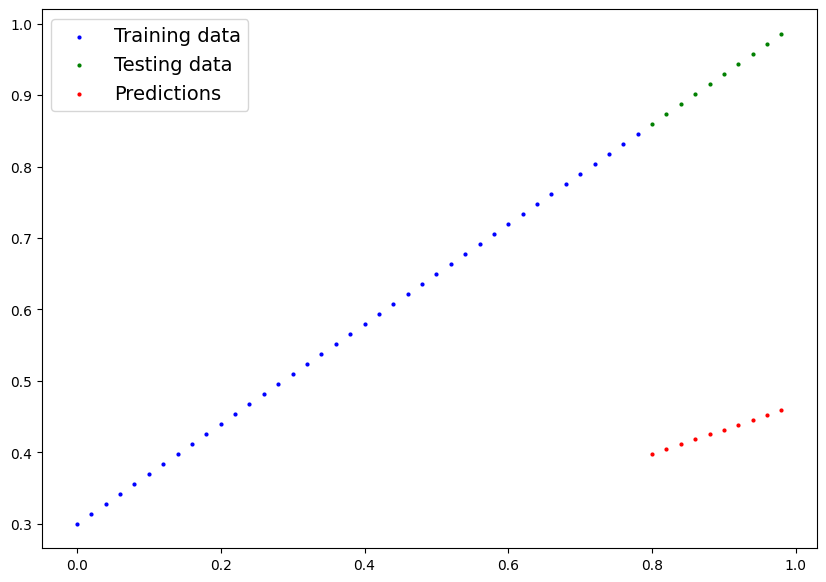

In [11]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# create known parameters
weight = 0.7
bias = 0.3

# create data
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

# crerating training and testing data
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

#visuling data
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  plt.figure(figsize=(10, 7))

  #plot training data into blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  #plot testing data into green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

# plot_predictions()

# create a linear regression model class
class LinearRegressionModel(nn.Module):

  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias

torch.manual_seed(42)
model_0 = LinearRegressionModel()

with torch.inference_mode():
  y_pred = model_0(X_test)

print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_pred)}")
print(f"Predicted values: \n{y_pred}")

plot_predictions(predictions=y_pred)